# Identifying Traits of Sports Talent in Malaysian Children Through Motor Performance

## Background

Evaluating children's physical abilities is crucial for gaining insight into their growth and development, as well as for recognizing potential talent in sports. One common metric for this assessment is the Motor Performance Index (MPI), which measures different aspects of a child's motor skills.

### Objectives
The primary objective of this report is to analyze datasets related to children's motor performance using summary statistics, visualizations, statistical models, and narratives. Specifically, it aims to:

1. Explore the demographic profile and characteristics of the sample.
2. Understand the relationship between the four motor skills.
3. Explain how the children's  attributes affect their motor skills.

### Data Used
The dataset used in the analysis is a slightly cleaned version of a dataset described in the article entitled ["Kids motor performances datasets"](https://www.sciencedirect.com/science/article/pii/S2352340920314633) from the Data in Brief journal. It consists of a single CSV file, where each row represents a seven year old Malaysian child. The following lists describe its variables: 

Four properties of motor skills were recorded.

- POWER ($cm$): Distance of a two-footed standing jump.
- SPEED ($sec$): Time taken to sprint 20m.
- FLEXIBILITY ($cm$): Distance reached forward in a sitting position.
- COORDINATION (no.): Number of catches of a ball, out of ten.

Attributes of the children are included.

- STATE: The Malaysian state where the child resides.
- RESIDENTIAL: Whether the child lives in a rural or urban area.
- GENDER: The child's gender, `F`emale or `M`ale.
- AGE: The child's age in years.
- WEIGHT ($kg$): The child's bodyweight in kg.
- HEIGHT ($cm$): The child's height in cm.
- BMI ($kg/m^{2}$): The child's body mass index (weight in kg divided by height in meters squared).
- CLASS (BMI): Categorization of the BMI: "SEVERE THINNESS", "THINNESS", "NORMAL", "OVERWEIGHT", "OBESITY".

(Full details of these metrics are described in sections 2.2 to 2.5 of the linked article.)

In [2]:
## ---------- Pre-installed Packages, Dataset, and Vectors for Variable Names

# Load pre-installed, required packages
suppressPackageStartupMessages(library(tidyverse)) 
suppressPackageStartupMessages(library(dplyr)) 
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(readr))

# Read the data set from the CSV file
motor_performance <- read_csv("data/motor-performance.csv", show_col_types = FALSE)

# Make a character vector for all 8 attributes
attributes <- c("STATE",
                "RESIDENTIAL",
                "GENDER",
                "AGE",
                "WEIGHT (kg)",
                "HEIGHT (CM)",
                "BMI (kg/m2)",
                "CLASS (BMI)")

# Make a character vector for all 4 motor skills
motor_skills <- c("POWER (cm)",
                  "SPEED (sec)",
                  "FLEXIBILITY (cm)",
                  "COORDINATION (no.)")

# Make a character vector for all numerical variables
num_vars <- c("AGE",
              "WEIGHT (kg)",
              "HEIGHT (cm)",
              "BMI (kg/m2)",
              "POWER (cm)",
              "SPEED (sec)",
              "FLEXIBILITY (cm)", 
              "COORDINATION (no.)")

## Results & Discussion
### Descriptive Analysis

The following information describe the demographic profile and characteristics of the sample composing of 1998 seven-year-old children who are in national primary regional school and participating in Malaysia's physical fitness test (SEGAK).

#### Numerical Variables
- As expected, the mean age of the children is around 7, with a standard deviation of 0.05.
- The mean weight is 22.21 kg, with a standard deviation of 5.41.
- The mean height is 118.26 cm, with a standard deviation of 5.97.
- The mean body mass index (BMI) is 15.77 (kg/m<sup>2</sup>), with a standard deviation of 3.06.
- The mean distance of a two-footed standing jump is 96.20 cm, with a standard deviation of 17.59.
- The mean time taken to sprint 20 m is 5.16 sec, with a standard deviation of 0.71.
- The mean distance reached forward in a sitting position is 26.2615 cm, with a standard deviation of 4.93.
- Out of ten, the mean number of ball catches is about 4, with a standard deviation of about 3.
- We can see from the boxplots below that all numerical variables seem to be symmetrically distributed at their median.

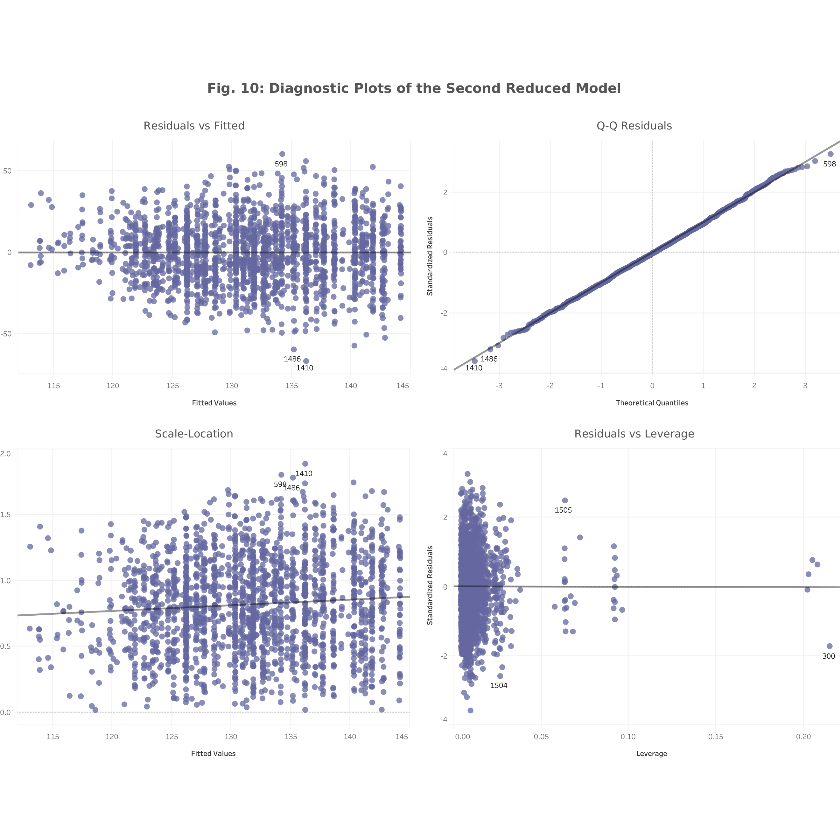

In [111]:
# ----- For link's image thumbnail

# Install and load the 'patchwork' package
#suppressWarnings(suppressMessages(install.packages("patchwork", verbose=TRUE, quiet=TRUE))) 
#suppressPackageStartupMessages(library(patchwork))

# Install and load the 'png' package
#suppressWarnings(suppressMessages(install.packages("png", verbose=TRUE, quiet=TRUE)))       
#suppressPackageStartupMessages(library(png))

# Create a data
data <- data.frame(x = 1:3,
                   y = 1:3)

# Read the PNG file
my_image <- readPNG("documentation/resid_plots.png", native = TRUE)

# Create a plot and combine with the image
ggplot(data, aes(x, y)) +
	geom_point() +
	theme_minimal() +
	theme(axis.title = element_blank(),
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank()) +
	inset_element(p = my_image,
                  left = -0.07,
                  bottom = -0.5,
                  right = 1.05,
                  top = 1.5)

In [3]:
## ---------- Descriptive Analysis

## ----- Numerical Variables

# Subset numerical variable columms
stacked_num_vars <- stack(
    motor_performance %>% 
    dplyr::select(all_of(num_vars))
) %>%
    rename(Variable = ind) %>%
	mutate(Type = ifelse(Variable %in% c("AGE","WEIGHT (kg)","HEIGHT (cm)","BMI (kg/m2)"),
                         "Attribute", "Motor skill"))

# Summary statistics for numerical variables
sum_stats <- data.frame(Variable = num_vars) %>%
	bind_cols(as.data.frame(t(motor_performance %>%
                              summarise_at(num_vars, list(mean)) %>%
                              bind_rows(motor_performance %>%
                                        summarise_at(num_vars, list(sd)), motor_performance %>%
                                        summarise_at(num_vars, list(min)),
                                        motor_performance %>%
                                        summarise_at(num_vars, list(median)),
                                        motor_performance %>%
                                        summarise_at(num_vars, list(max)))
                             )) %>%
              rename(Mean = V1,
                     `Std. Dev.` = V2,
                     `Min.` = V3,
                     `Median` = V4,
                     `Max.` = V5))

rownames(sum_stats) <- 1: nrow(sum_stats)

# Boxplots for numerical variables
boxplots <- ggplot(stacked_num_vars, aes(x = Variable, y = values, fill=Type)) +       
	geom_boxplot(width = 0.75) +
	theme(legend.position = "top",  
          legend.justification=0.48,
          legend.key.size = unit(7, 'mm'),
          legend.text = element_text(margin = margin(r = 10, unit = "pt"),
                                     size = 8.5,
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                   face = "bold",
                                   size = 9,
                                   family="sans serif"),  
          legend.key = element_rect(fill = NA),
          axis.title = element_text(color = "#65707C",
                                    face = "bold",
                                    size = 8.5,
                                    family="sans serif"),
          axis.text = element_text(color = "#65707C",
                                   size = 8,
                                   family="sans serif"),
          axis.line = element_line(colour = "grey",
                                   linewidth = 0.5),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          panel.border = element_rect(color="grey40",
                                      fill=NA),  
          panel.spacing = unit(2, "lines"),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    face = "bold",
                                    size= 11,
                                    family = "sans serif")) +
	labs(x = "\nVariable \n(unit)\n", y = "", fill = "Type:  ") +
	ggtitle("\n Fig. 1: Box Plots of the Numerical Attributes and Motor Skills          ") +
	scale_x_discrete(labels=c("AGE",
              "WEIGHT \n(kg)",
              "HEIGHT \n(cm)",
              "BMI \n(kg/m2)",
              "POWER \n(cm)",
              "SPEED \n(sec)",
              "FLEXIBILITY \n(cm)", 
              "COORDINATION \n(no.)")) + 
	scale_y_continuous(expand = c(0.01, 0),
                       limits = c(0, 175), 
                       breaks = seq(0, 175, by = 25)) +
	scale_fill_manual(values = c('#025C70',
                                 '#007E6C'))

# Save ggplot data
dat <- ggplot_build(boxplots)$data[[1]]

# Reformat boxplots' median line
final_boxplots <- boxplots + geom_segment(data=dat, aes(x=xmin, 
                                      xend=xmax,
                                      y=middle-.15,
                                      yend=middle-.15), 
                        color="grey75", 
                        linewidth=0.5,
                        inherit.aes = FALSE)

<img src="documentation/final_boxplots.png" alt="" title=""/>

#### Categorical Variables

- The five Malaysian states with the most number of children residing in are:</br>
    ㅤ1. Selangor - 349 (17.5%)</br>
    ㅤ2. Johor - 241 (12.1%)</br>
    ㅤ3. Sabah - 202 (10.1%)</br>
    ㅤ4. Sarawak - 199 (10.0%)</br>
    ㅤ5. Perak - 166 (8.3%)</br>

<img src="documentation/bar_graph1.jpg" alt="" title=""/>

In [4]:
## ----- Categorical Variables

# Count children per state
state_counts <- motor_performance %>%
	count(STATE, sort = TRUE)  %>%
	mutate(proportion = n/1998, Attribute = "STATE",
           Percentage = label_percent(accuracy=0.01)(proportion)) %>%
	rename(`Number of children` = n)

state_counts

STATE,Number of children,proportion,Attribute,Percentage
<chr>,<int>,<dbl>,<chr>,<chr>
SELANGOR,349,0.174674675,STATE,17.47%
JOHOR,241,0.120620621,STATE,12.06%
SABAH,202,0.101101101,STATE,10.11%
SARAWAK,199,0.099599600,STATE,9.96%
PERAK,166,0.083083083,STATE,8.31%
KEDAH,133,0.066566567,STATE,6.66%
PAHANG,129,0.064564565,STATE,6.46%
KELANTAN,128,0.064064064,STATE,6.41%
PULAU PINANG,122,0.061061061,STATE,6.11%


- Majority or 52.7% (1,052) of the sampled children are urban residents.

In [5]:
# Count children per residential
residential_counts <- motor_performance %>%
	count(RESIDENTIAL, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "RESIDENTIAL",
           Percentage = label_percent(accuracy=0.01)(proportion),
           lab.ypos = cumsum(proportion) - 0.6*proportion) %>%
	rename(`Number of children` = n)

# Create a pie chart for the RESIDENTIAL variable
pie_chart_for_residential <- ggplot(residential_counts, aes(x = "", y = proportion, fill = RESIDENTIAL)) +
    geom_bar(width = 1, stat = "identity", color = "grey", linewidth=0.75) +
    coord_polar("y", start = 0)+
    geom_text(aes(y = lab.ypos, 
                  label = paste(label_percent(accuracy=0.01)(proportion),
                                "\n (", prettyNum(`Number of children`,
                                                  big.mark=","),")",
                                sep="")), color = "white",  size = 6)+
    scale_fill_manual(values = c("#31688E", "#65C899")) +
	ggtitle("\n Fig. 3: Pie Graph of the Distribution of Children per Residential Area  \n") +
	theme(legend.position = "top",
          legend.justification=0.48,
          legend.direction="horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.key = element_rect(fill = NA),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                      size = 9,         
                                      face = "bold",          
                                      family="sans serif"),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    face = "bold",
                                    size= 11,
                                    family = "sans serif")) +
	labs(fill="RESIDENTIAL:  ")+
    guides(fill = guide_legend(override.aes = list(
        				      	 shape = 15,
        				         size = 6)))

<img src="documentation/pie_chart_for_residential.png" alt="" title=""/>

- There is an equal distribution between male and female gender groups.

In [6]:
# Count children per gender
gender_counts <- motor_performance %>%
  count(GENDER, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "GENDER",
           Percentage = label_percent(accuracy=0.01)(proportion),
           lab.ypos = cumsum(proportion) - 0.6*proportion) %>%
	rename(`Number of children` = n)

# Create a pie chart for the GENDER variable
pie_chart_for_gender <- ggplot(gender_counts, aes(x = "", y = proportion, fill = GENDER)) +
    geom_bar(width = 1, stat = "identity", color = "grey", linewidth=0.75) +
    coord_polar("y", start = 0) +
    geom_text(aes(y = lab.ypos, 
                  label = paste(label_percent(accuracy=0.01)(proportion),
                                "\n (", prettyNum(`Number of children`,
                                                  big.mark=","),")",
                                sep="")), color = "white",  size = 6) +
    scale_fill_manual(values = c("#31688E", "#65C899")) +
	ggtitle("\nFig. 4: Pie Graph of the Distribution of Children per Gender   \n") + 
	theme(legend.position = "top",
          legend.justification=0.48,
          legend.direction="horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.key = element_rect(fill = NA),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                      size = 9,    
                                      face = "bold",
                                      family="sans serif"),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    face = "bold",
                                    hjust = 0.5,
                                    size= 11,
                                    family = "sans serif")) +
	labs(fill="GENDER:  ") +
    guides(fill = guide_legend(override.aes = list(
        				      	 shape = 15,
        				         size = 6)))

<img src="documentation/pie_chart_for_gender.png" alt="" title=""/>

In [7]:
# Count children per BMI class
bmi_class_counts <- motor_performance %>%
  count(`CLASS (BMI)`, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "CLASS (BMI)",
           Percentage = label_percent(accuracy=0.01)(proportion)) %>%
	rename(`Number of children` = n)

- Majority or 71% (1,419) of the sampled children have normal BMIs.

<img src="documentation/bar_graph2.jpg" alt="" title=""/>

In [8]:
bmi_class_counts

CLASS (BMI),Number of children,proportion,Attribute,Percentage
<chr>,<int>,<dbl>,<chr>,<chr>
NORMAL,1419,0.71021021,CLASS (BMI),71.02%
OBESITY,218,0.10910911,CLASS (BMI),10.91%
OVERWEIGHT,205,0.10260260,CLASS (BMI),10.26%
THINNESS,108,0.05405405,CLASS (BMI),5.41%
SEVERE THINNESS,48,0.02402402,CLASS (BMI),2.40%


### Correlation Analysis
Using the sample, the following observations can be said about the pairwise correlations of the four motor skills:
- There is a low negative correlation of 0.36 between power and speed.
- Other pairs of variables seem to have negligible levels of correlation. 

(This [table](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/table/T1/?report=objectonly) was used for interpreting correlation coefficients.)

In [9]:
## ---------- Correlation Analysis

# Install & load the "corrplot" package for correlation plots
suppressWarnings(suppressMessages(install.packages("corrplot", verbose = T, quiet=T)))
suppressPackageStartupMessages(library(corrplot))

# Subset motor skill columns
motor_skills_df <- motor_performance %>%
	dplyr::select(all_of(motor_skills)) %>%
    rename(POWER = `POWER (cm)`,
           SPEED = `SPEED (sec)`,
           FLEXIBILITY = `FLEXIBILITY (cm)`,
           COORDINATION = `COORDINATION (no.)`)

# Color scheme for the correlation plot
col <- colorRampPalette(c("#025C70", "white", "#007E6C"))

# Correlation plot for motor skills
#par(family="sans serif")
#corrplot(cor(motor_skills_df), 
#         method="color", 
#         col=col(20),
#         order="FPC",
#         type="lower",
#         diag=FALSE, 
#         cl.cex=0.5,
#         tl.cex=0.9,
#         tl.srt=0,
#         tl.col="#65707C",
#         col.main="#65707C",
#         addCoef.col="#65707C",
#         addgrid.col="black",
#         main="\nFig. 6: Correlation Plot of the Four Motor Skills          ",
#         cex.main=1.1,
#         mar = c(5,3.5,6,0)
#        )

# Pairwise correlation coefficients for motor skills
motor_performance.cor <- cor(motor_performance %>%
	dplyr::select(all_of(motor_skills)))
                             
pairwise_corr <- data.frame(Variable = num_vars[5:8]) %>% 
	bind_cols(as.data.frame(round(motor_performance.cor, 2)) %>%
		dplyr::select(all_of(motor_skills)))

rownames(pairwise_corr) <- 1:nrow(pairwise_corr)

<img src="documentation/corrplot.png" alt="" title=""/>

### Regression Analysis

The Motor Performance Index (MPI) was computed based on the sum of the four motors skills, which served as the dependent variable in a general linear model (GLM). The independent variables included all eight child attributes, with dummy variables automatically generated for each categorical attribute.

#### Full Model

The following infomation describe the full model:

- It has a residual standard error of 18.5998 and an R-square of 0.1143 (i.e. 11.43% of the variation in MPI can be explained by the 25 independent variables).
- Seven (7) independent variables were significant at 0.05 level, which are:</br>
    ㅤ1. STATE KEDAH</br>
    ㅤ2. STATE KUALA LUMPUR</br>
    ㅤ3. STATE PULAU PINANG</br>
    ㅤ4. STATE SABAH</br>
    ㅤ5. STATE SELANGOR</br>
    ㅤ6. GENDER M</br>
    ㅤ7. CLASS (BMI) THINNESS</br>

In [10]:
## ---------- Regression Analysis

# Create an index variable called MPI
data_for_regression <- motor_performance %>% 
    mutate(MPI = (`POWER (cm)` + `SPEED (sec)` + `FLEXIBILITY (cm)` + `COORDINATION (no.)`))

## ----- Full Model
full_model <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + AGE + `WEIGHT (kg)` + `HEIGHT (cm)` + `BMI (kg/m2)` + `CLASS (BMI)`, data = data_for_regression)

# Summary statistics of the full model
paste("Residual standard error:", round(summary.lm(full_model)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(full_model)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(full_model)$adj.r.squared, 4))

# Full model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_full <- data.frame(
    Variable = rownames(as.data.frame(summary.lm(full_model)$coefficients))
) %>%
	bind_cols(as.data.frame(summary.lm(full_model)$coefficients))

rownames(summary_full) <- 1:nrow(summary_full)
summary_full

[1] "Residual standard error: 18.5998  ,  R-square:  0.1143  ,  Adj. R-square:  0.103"

,Variable,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),65.0217354,69.1123732,0.94081179,3.469165e-01
2,STATEKEDAH,4.9864502,2.0291488,2.45740983,1.407982e-02
3,STATEKELANTAN,-0.2035077,2.0697095,-0.09832669,9.216829e-01
4,STATEKUALA LUMPUR,4.9068455,2.3175311,2.11727272,3.436159e-02
5,STATELABUAN,-4.8443791,8.4380719,-0.57410973,5.659590e-01
6,STATEMELAKA,-5.2062606,3.0569554,-1.70308686,8.870939e-02
7,STATENEGERI SEMBILAN,-3.4623878,2.5126976,-1.37795642,1.683731e-01
8,STATEPAHANG,-1.5492991,2.0377064,-0.76031522,4.471571e-01
9,STATEPERAK,-2.4083089,1.8931314,-1.27212978,2.034770e-01


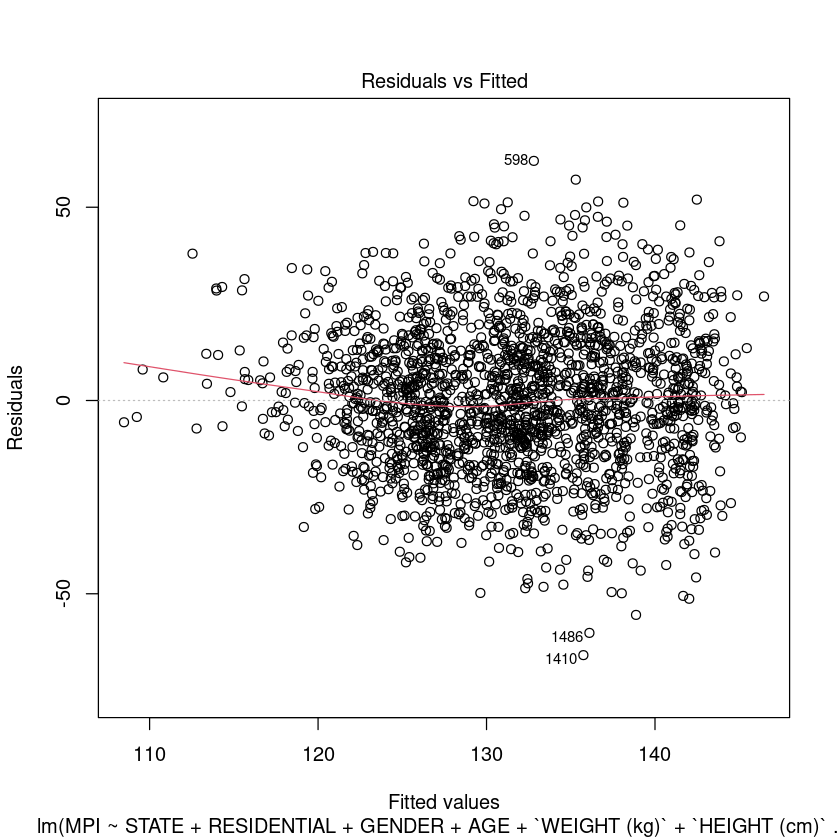

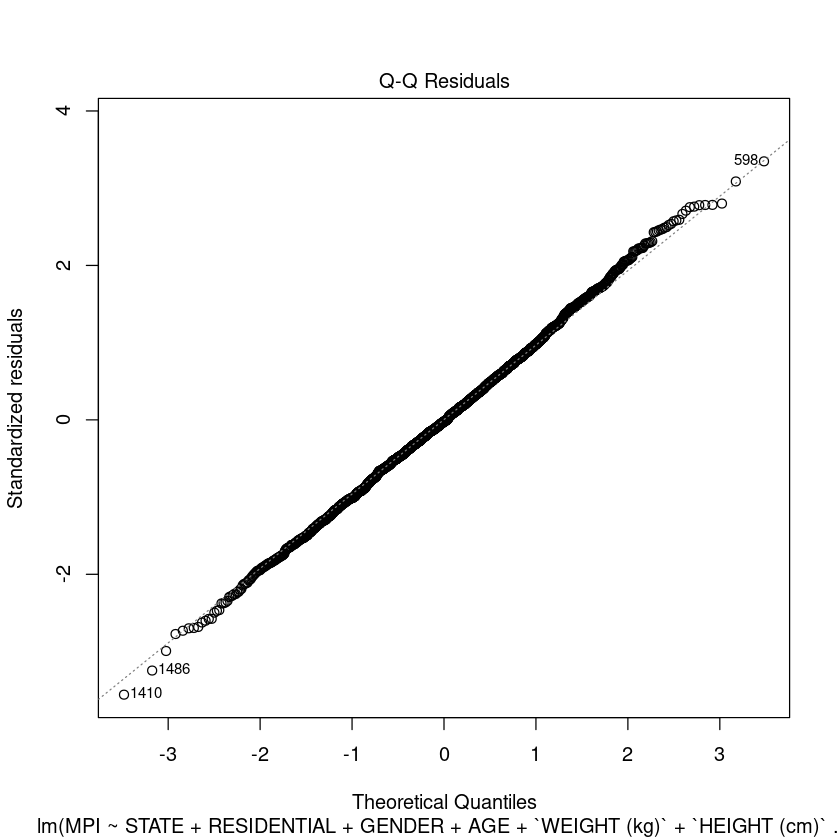

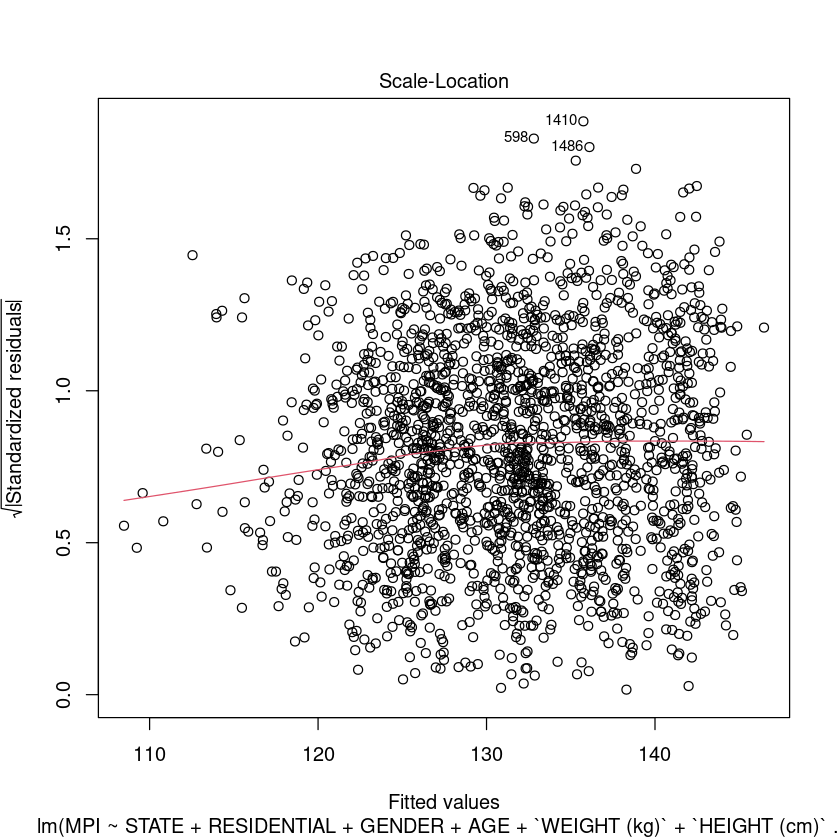

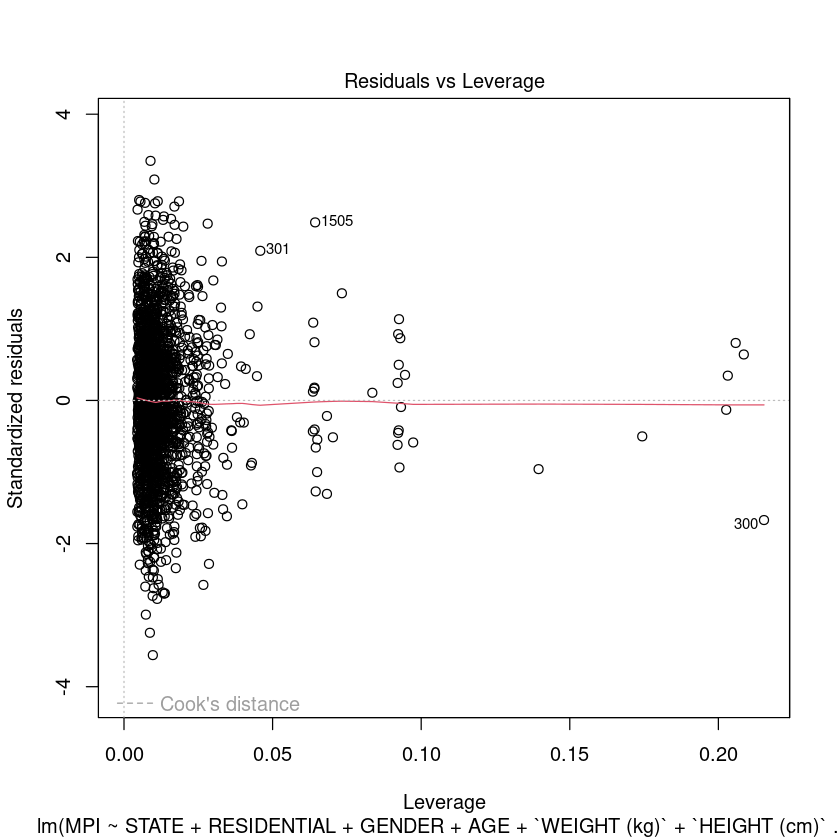

In [11]:
plot(full_model)

#### Reduced Model
Using a backward elimination procedure, a reduced model consisting of 23 predictor variables was developed. This model excludes the variables for age and body mass index (BMI in $kg/m^{2}$), likely due to the homogeneity of children's ages within the sample and the correlation of BMI with other variables, specifically height and weight.

The following information describe the reduced model:

- It has a slightly better residual standard error of 18.5986 compared to the full model.
- The model's R-square slightly increased to 0.1135, that is, 11.35% of the variation in MPI can be accounted by the 23 independent variables in the model”.
- The same seven (7) independent variables with the addition of WEIGHT ($kg$) were significant at 0.05 level.

In [12]:
# Install & load the "MASS" package for backward stepwise regression
suppressWarnings(suppressMessages(install.packages("MASS", verbose = T, quiet=T)))
suppressPackageStartupMessages(library(MASS))

# 1 here means the intercept 
null <- lm(`POWER (cm)` ~ 1, data = data_for_regression)

# Backward elimination
bw_elim <- stepAIC(full_model, scope=list(lower=null, upper=full_model),
                   data = data_for_regression, direction='backward')

## ----- First Reduced Model
reduced_model1 <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + `WEIGHT (kg)` + `HEIGHT (cm)` + `CLASS (BMI)`, data = data_for_regression)

# Summary statistics of the first reduced model
paste("Residual standard error:", round(summary.lm(reduced_model1)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(reduced_model1)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(reduced_model1)$adj.r.squared, 4))

# First reduced model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_reduced1 <- data.frame(
    Variable = rownames(as.data.frame(summary.lm(reduced_model1)$coefficients))
) %>%
	bind_cols(as.data.frame(summary.lm(reduced_model1)$coefficients))

rownames(summary_reduced1) <- 1:nrow(summary_reduced1)
summary_reduced1

#plot(reduced_model1)

Start:  AIC=11706.73
MPI ~ STATE + RESIDENTIAL + GENDER + AGE + `WEIGHT (kg)` + `HEIGHT (cm)` + 
    `BMI (kg/m2)` + `CLASS (BMI)`

                Df Sum of Sq    RSS   AIC
- AGE            1         3 682219 11705
- `BMI (kg/m2)`  1       605 682821 11706
<none>                       682216 11707
- RESIDENTIAL    1      1106 683322 11708
- `HEIGHT (cm)`  1      1223 683439 11708
- `WEIGHT (kg)`  1      1309 683526 11709
- `CLASS (BMI)`  4      6009 688225 11716
- STATE         15     23466 705682 11744
- GENDER         1     49106 731322 11844

Step:  AIC=11704.74
MPI ~ STATE + RESIDENTIAL + GENDER + `WEIGHT (kg)` + `HEIGHT (cm)` + 
    `BMI (kg/m2)` + `CLASS (BMI)`

                Df Sum of Sq    RSS   AIC
- `BMI (kg/m2)`  1       605 682824 11704
<none>                       682219 11705
- RESIDENTIAL    1      1114 683333 11706
- `HEIGHT (cm)`  1      1224 683443 11706
- `WEIGHT (kg)`  1      1310 683529 11707
- `CLASS (BMI)`  4      6006 688225 11714
- STATE         15     23464

[1] "Residual standard error: 18.5986  ,  R-square:  0.1135  ,  Adj. R-square:  0.1032"

,Variable,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),114.6837462,10.5498589,10.8706427,8.972322e-27
2,STATEKEDAH,4.9995849,2.0288212,2.4642807,1.381351e-02
3,STATEKELANTAN,-0.2746474,2.0685727,-0.1327714,8.943877e-01
4,STATEKUALA LUMPUR,4.8511979,2.3144001,2.0960930,3.620098e-02
5,STATELABUAN,-4.7655878,8.4361872,-0.5648983,5.722071e-01
6,STATEMELAKA,-4.8875654,3.0464262,-1.6043603,1.087946e-01
7,STATENEGERI SEMBILAN,-3.4943188,2.5121631,-1.3909602,1.643943e-01
8,STATEPAHANG,-1.5896358,2.0353551,-0.7810115,4.348894e-01
9,STATEPERAK,-2.5389245,1.8901321,-1.3432524,1.793447e-01


#### Diagnostics Checking
The reduced model was evaluated for assumptions to demonstrate its validity.

##### Multicollinearity
Four of the six attributes exhibit Variance Inflation Factor (VIF) values near 1, whereas two attributes have values exceeding five. This indicates a potential presence of multicollinearity within the model, particularly between WEIGHT ($kg$) and CLASS (BMI).

In [13]:
## ----- Diagnostics Checking

# Install & load the "car" package for Variance inflation factor (VIF)
suppressWarnings(suppressMessages(install.packages("car", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(car))

# VIF for detecting multicollinearity
vif_1 <- data.frame(Attribute = c("STATE",
                        "RESIDENTIAL",
                        "GENDER",
                        "WEIGHT (kg)",
                        "HEIGHT (cm)", "CLASS (BMI)")) %>%
	bind_cols(as.data.frame(vif(reduced_model1))) 

rownames(vif_1) <- 1:nrow(vif_1)
vif_1

,Attribute,GVIF,Df,GVIF^(1/(2*Df))
,<chr>,<dbl>,<dbl>,<dbl>
1,STATE,1.222732,15,1.006725
2,RESIDENTIAL,1.122544,1,1.059502
3,GENDER,1.025710,1,1.012773
4,WEIGHT (kg),7.717934,1,2.778117
5,HEIGHT (cm),2.694061,1,1.641360
6,CLASS (BMI),5.389246,4,1.234358


Excluding WEIGHT ($kg$) from the model resulted in VIF values nearing 1 for all attributes, indicating that none of the five attributes are significantly correlated.

In [14]:
## ----- Second Reduced Model
reduced_model2 <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + `HEIGHT (cm)` + `CLASS (BMI)`,
                     data = data_for_regression)

# Variance inflation factor (VIF) for detecting multicollinearity
vif_2 <- data.frame(Attribute = c("STATE",
                                 "RESIDENTIAL",
                                 "GENDER",
                                 "HEIGHT (cm)",
                                 "CLASS (BMI)")) %>%
	bind_cols(as.data.frame(vif(reduced_model2))) 

rownames(vif_2) <- 1:nrow(vif_2)
vif_2

,Attribute,GVIF,Df,GVIF^(1/(2*Df))
,<chr>,<dbl>,<dbl>,<dbl>
1,STATE,1.209391,15,1.006357
2,RESIDENTIAL,1.121651,1,1.059080
3,GENDER,1.025265,1,1.012554
4,HEIGHT (cm),1.106692,1,1.051994
5,CLASS (BMI),1.131043,4,1.015512


##### Homoscedasticity
Based on the results of the Breusch-Pagan test, with a p-value of 0.0001568 (significant at the 0.05 level), we reject the null hypothesis of constant variances, suggesting a violation of the homoscedasticity assumption in this model. Remedial measures, such as Weighted Least Squares (WLS) or data transformation, may be required.

   <br/>          **Fig. 7: Studentized Breusch-Pagan Test**

In [15]:
# Install & load the "lmtest" package for Breusch-Pagan (BP) Test
suppressWarnings(suppressMessages(install.packages("lmtest", verbose = T, quiet=T)))
suppressPackageStartupMessages(library(lmtest))

# BP Test for determining presence of heteroscedasticity
bp_test_stat <- bptest(reduced_model2)$statistic
names(bp_test_stat)[1] <- "Test statistic"

# Test statistic
bp_test_stat

# Degrees of freedom
bptest(reduced_model2)$parameter

# P-value
bp_pv <- bptest(reduced_model2)$p.value
names(bp_pv)[1] <- "p-value"
bp_pv 

Test statistic 
       54.1481

df 
22

p-value 
0.0001567733

##### Autocorrelation
The model was also tested for first-order autocorrelation in the random error terms using the Breusch-Godfrey test. With a p-value below 0.05, we reject the null hypothesis and conclude that autocorrelation exists among the residuals at an order of 1 or less.

   <br/>          **Fig. 8: Breusch-Godfrey Test for Serial Correlation of Order up to 1**

In [16]:
# BP Test for determining presence of autocorrelation
bg_test_stat <- bgtest(reduced_model2)$statistic
names(bg_test_stat)[1] <- "Test statistic"

# Test-statistic
bg_test_stat

# Degrees of freedom
bgtest(reduced_model2)$parameter

# P-value
bg_pv <- bgtest(reduced_model2)$p.value
names(bg_pv)[1] <- "p-value"
bg_pv 

Test statistic 
      371.9502

df 
 1

p-value 
7.040228e-83

##### Normality
Shapiro-Wilk normality test shows a p-value of 0.6914, which is insignificant at 0.05 level. Therefore, we do not reject the null hypothesis of normally distributed error terms and conclude that the residuals are drawn from a normal distribution.

   <br/>          **Fig. 9: Shapiro-Wilk Normality Test**

In [17]:
# Shapiro-Wilk Normality Test
sw_test_stat <- shapiro.test(resid(reduced_model2))$statistic
names(sw_test_stat)[1] <- "Test statistic"
sw_test_stat

# P-value
sw_pv <- shapiro.test(resid(reduced_model2))$p.value
names(sw_pv)[1] <- "p-value"
sw_pv

Test statistic 
     0.9993066

p-value 
0.6913965

In [91]:
q <- (rank(rstandard(reduced_model2)) - .5) / length(rstandard(reduced_model2))


residuals_df <- data.frame(residuals = reduced_model2$residuals,
						   fitted_values = reduced_model2$fitted.values,
                           standardized_residuals = rstandard(reduced_model2),
						   theoretical_quantiles = qnorm(
							   q,
							   mean(rstandard(reduced_model2)),
							   sd(rstandard(reduced_model2))
						   ),
						   leverage = hatvalues(reduced_model2)
						  )
write.csv(residuals_df, "residuals_df.csv")

<img src="documentation/resid_plots.png" alt="" title=""/>

#### Final Model
The following infomation describe the final model:

- The final model has a standard error of 18.6184 in predicting MPI.
- The model's R-square is 0.1111, which means that 11.11% of the variation in MPI can be explained by the 22 independent variables.
- Eight (8) independent variables were significant at 0.05 level, which are:</br>
    ㅤ1. STATE KEDAH</br>
    ㅤ2. STATE KUALA LUMPUR</br>
    ㅤ3. STATE PULAU PINANG</br>
    ㅤ4. STATE SABAH</br>
    ㅤ5. STATE SELANGOR</br>
    ㅤ6. GENDER M</br>
    ㅤ7. CLASS (BMI) OBESITY</br>
    ㅤ8. CLASS (BMI) THINNESS

In [22]:
## ----- Second Reduced / Final Model

# Summary statistics of the second reduced / final model
paste("Residual standard error:", round(summary.lm(reduced_model2)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(reduced_model2)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(reduced_model2)$adj.r.squared, 4))

# Second reduced / final model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_reduced2 <- data.frame(Variable = rownames(
                	as.data.frame(summary.lm(reduced_model2)$coefficients))
                          ) %>%
	bind_cols(as.data.frame(summary.lm(reduced_model2)$coefficients))
rownames(summary_reduced2) <- 1:nrow(summary_reduced2)

summary_reduced2

[1] "Residual standard error: 18.6184  ,  R-square:  0.1111  ,  Adj. R-square:  0.1012"

,Variable,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),128.186424988,8.73968327,14.66717053,2.601903e-46
2,STATEKEDAH,5.067786255,2.03075510,2.49551817,1.265837e-02
3,STATEKELANTAN,-0.027453992,2.06792296,-0.01327612,9.894088e-01
4,STATEKUALA LUMPUR,4.737962881,2.31632457,2.04546588,4.094119e-02
5,STATELABUAN,-4.315881290,8.44283806,-0.51118845,6.092762e-01
6,STATEMELAKA,-5.042016560,3.04890750,-1.65371254,9.834485e-02
7,STATENEGERI SEMBILAN,-3.565114571,2.51463902,-1.41774407,1.564232e-01
8,STATEPAHANG,-1.527963461,2.03733681,-0.74998079,4.533556e-01
9,STATEPERAK,-2.543450663,1.89213853,-1.34422011,1.790316e-01


## Conclusions

Using the available data and results of the analyses, the following conclusions can be drawn about the attributes, motor skills, and motor performances of the seven-year-old Malaysians in the sample:

- Children from Kedah, Kuala Lumpur, Sabah, and Selangor appear to have higher MPIs among others.
- Male children are more likely to have higher MPIs than their female counterparts. 
- Children with BMI classes of "Obesity" and "Thinness" have potentially less MPIs compared to the other classes.

## Recommendations
Based on these conclusions, among the eight attributes that were considered in identifying gifted young Malaysian sports talents, their STATE, GENDER, and CLASS (BMI) are the most significant. Specifically, the characteristics that can increase the chances of having a high Motor Performance Index (MPI) are:
- residing in the states of Kedah, Kuala Lumpur, Sabah, or Selangor;
- being male; and
- having a "Normal" BMI class.

Despite these recommended characteristics, however, one major limitation of the final model is it accounts for only a relatively small percentage of the variation in MPI. Therefore, it is suggested to look for additional attributes or variables that can potentially contribute to motor performance.

## Appendix
#### Tables
##### ***Summary statistics of the numerical variables***

In [23]:
sum_stats

,Variable,Mean,Std. Dev.,Min.,Median,Max.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGE,7.057508,0.04944554,7.00,7.10,7.1
2,WEIGHT (kg),22.208253,5.41222597,11.00,21.00,49.0
3,HEIGHT (cm),118.259660,5.97348877,76.50,118.05,140.0
4,BMI (kg/m2),15.774274,3.06391583,8.20,15.00,35.1
5,POWER (cm),96.200701,17.59424894,50.00,96.00,160.0
6,SPEED (sec),5.163423,0.70676451,1.59,5.10,10.0
7,FLEXIBILITY (cm),26.261512,4.93084932,9.00,26.50,41.0
8,COORDINATION (no.),4.079079,2.78017028,1.00,4.00,10.0


##### ***Counts and percentages of the categorical variables***

In [24]:
bind_rows(state_counts %>% 
	dplyr::select(Attribute, everything(), -proportion) %>%
	rename(Category = STATE),
          residential_counts %>% 
	dplyr::select(Attribute, everything(), -c(proportion, lab.ypos)) %>%
	rename(Category = RESIDENTIAL),
          gender_counts %>% 
	dplyr::select(Attribute, everything(), -c(proportion, lab.ypos)) %>%
	rename(Category = GENDER),
          bmi_class_counts %>% 
	dplyr::select(Attribute, everything(), -proportion) %>%
	rename(Category = `CLASS (BMI)`)
          )

Attribute,Category,Number of children,Percentage
<chr>,<chr>,<int>,<chr>
STATE,SELANGOR,349,17.47%
STATE,JOHOR,241,12.06%
STATE,SABAH,202,10.11%
STATE,SARAWAK,199,9.96%
STATE,PERAK,166,8.31%
STATE,KEDAH,133,6.66%
STATE,PAHANG,129,6.46%
STATE,KELANTAN,128,6.41%
STATE,PULAU PINANG,122,6.11%


#### Codes

[1] "Residual standard error: 18.5998  ,  R-square:  0.1143  ,  Adj. R-square:  0.103"

,Variable,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),65.0217354,69.1123732,0.94081179,3.469165e-01
2,STATEKEDAH,4.9864502,2.0291488,2.45740983,1.407982e-02
3,STATEKELANTAN,-0.2035077,2.0697095,-0.09832669,9.216829e-01
4,STATEKUALA LUMPUR,4.9068455,2.3175311,2.11727272,3.436159e-02
5,STATELABUAN,-4.8443791,8.4380719,-0.57410973,5.659590e-01
6,STATEMELAKA,-5.2062606,3.0569554,-1.70308686,8.870939e-02
7,STATENEGERI SEMBILAN,-3.4623878,2.5126976,-1.37795642,1.683731e-01
8,STATEPAHANG,-1.5492991,2.0377064,-0.76031522,4.471571e-01
9,STATEPERAK,-2.4083089,1.8931314,-1.27212978,2.034770e-01


[1] "Residual standard error: 18.5986  ,  R-square:  0.1135  ,  Adj. R-square:  0.1032"

,Variable,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),114.6837462,10.5498589,10.8706427,8.972322e-27
2,STATEKEDAH,4.9995849,2.0288212,2.4642807,1.381351e-02
3,STATEKELANTAN,-0.2746474,2.0685727,-0.1327714,8.943877e-01
4,STATEKUALA LUMPUR,4.8511979,2.3144001,2.0960930,3.620098e-02
5,STATELABUAN,-4.7655878,8.4361872,-0.5648983,5.722071e-01
6,STATEMELAKA,-4.8875654,3.0464262,-1.6043603,1.087946e-01
7,STATENEGERI SEMBILAN,-3.4943188,2.5121631,-1.3909602,1.643943e-01
8,STATEPAHANG,-1.5896358,2.0353551,-0.7810115,4.348894e-01
9,STATEPERAK,-2.5389245,1.8901321,-1.3432524,1.793447e-01


Test statistic 
       54.1481

df 
22

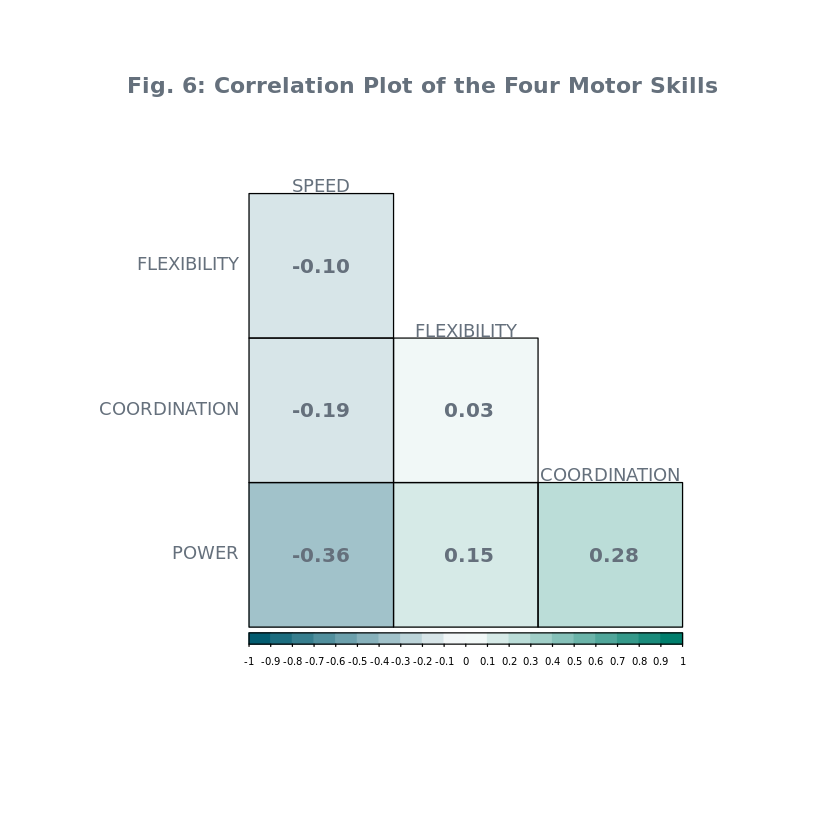

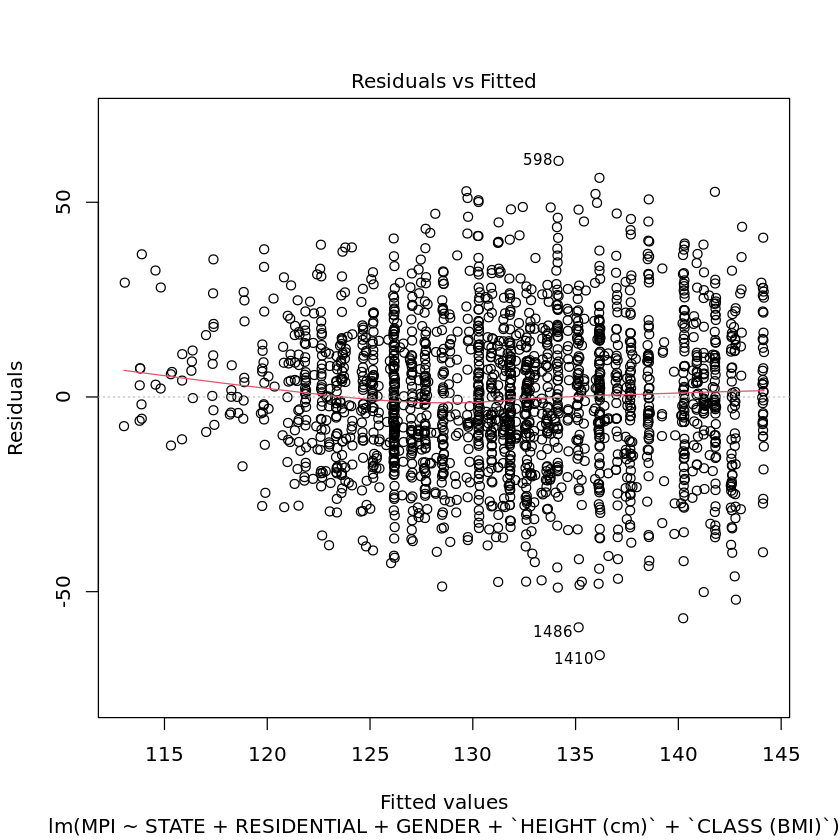

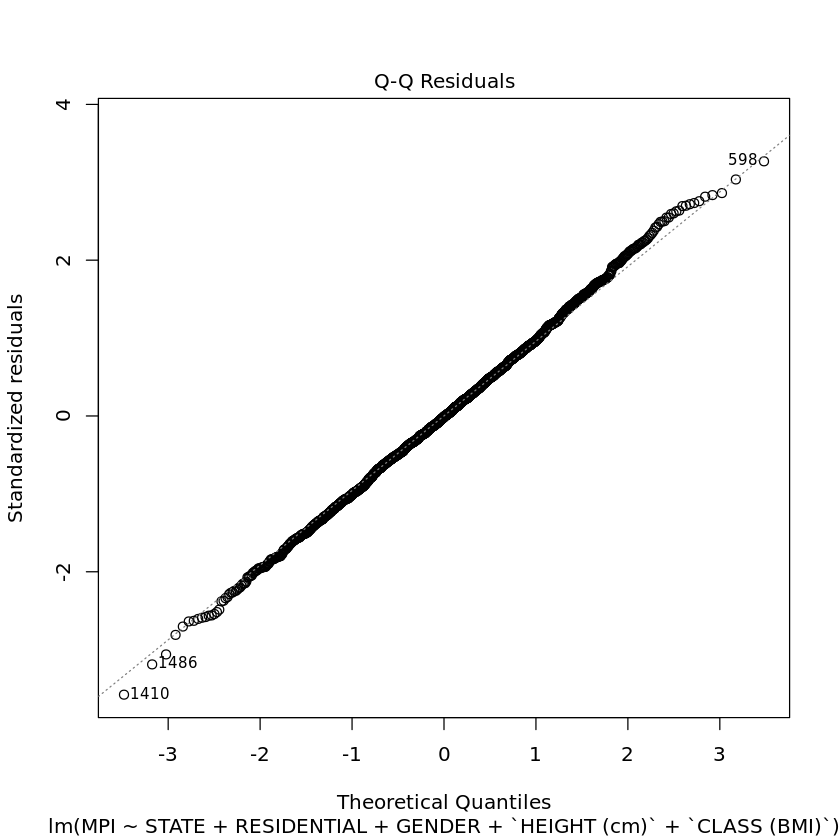

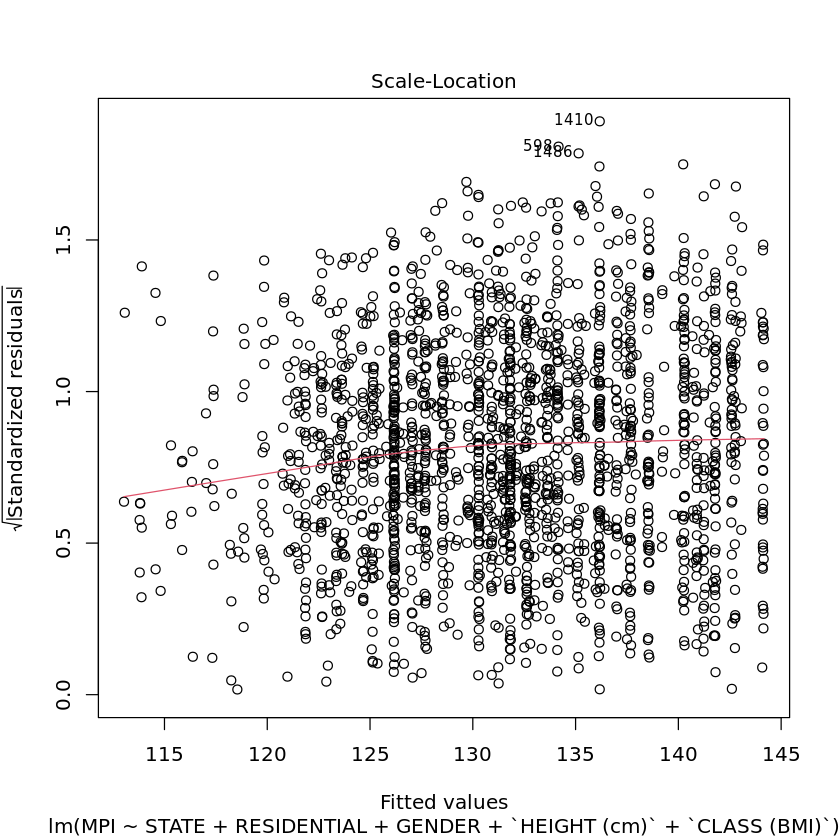

[1] "Residual standard error: 18.6184  ,  R-square:  0.1111  ,  Adj. R-square:  0.1012"

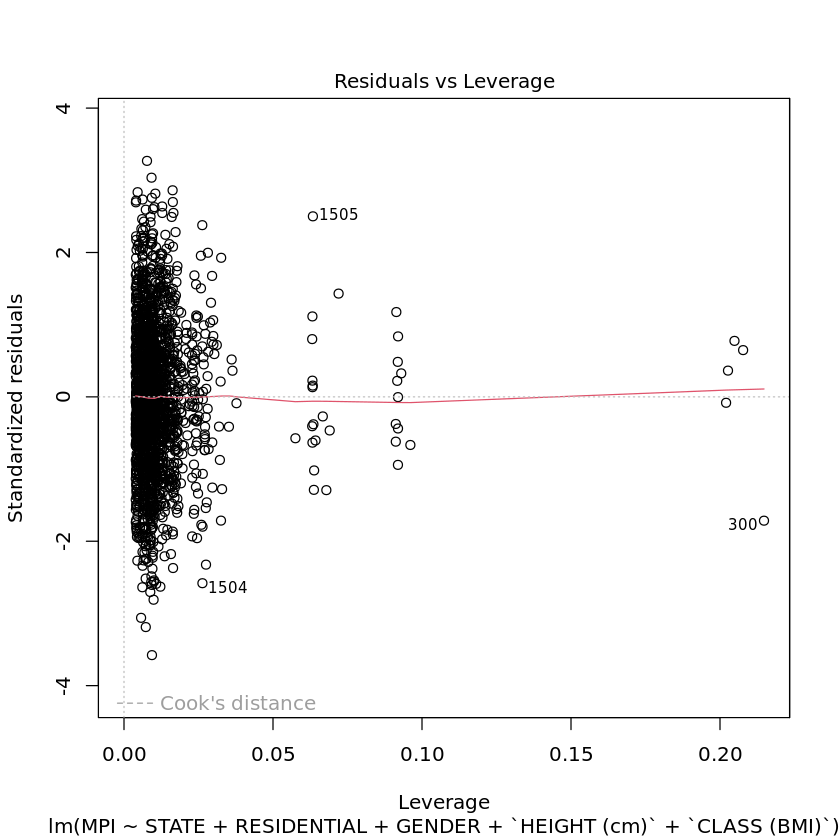

In [25]:
## ---------- Pre-installed Packages, Dataset, and Vectors for Variable Names

# Load pre-installed, required packages
suppressPackageStartupMessages(library(tidyverse)) 
suppressPackageStartupMessages(library(dplyr)) 
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(readr))

# Read the data set from the CSV file
motor_performance <- read_csv("data/motor-performance.csv", show_col_types = FALSE)

# Make a character vector for all 8 attributes
attributes <- c("STATE",
                "RESIDENTIAL",
                "GENDER",
                "AGE",
                "WEIGHT (kg)",
                "HEIGHT (CM)",
                "BMI (kg/m2)",
                "CLASS (BMI)")

# Make a character vector for all 4 motor skills
motor_skills <- c("POWER (cm)",
                  "SPEED (sec)",
                  "FLEXIBILITY (cm)",
                  "COORDINATION (no.)")

# Make a character vector for all numerical variables
num_vars <- c("AGE",
              "WEIGHT (kg)",
              "HEIGHT (cm)",
              "BMI (kg/m2)",
              "POWER (cm)",
              "SPEED (sec)",
              "FLEXIBILITY (cm)", 
              "COORDINATION (no.)")


## ---------- Descriptive Analysis

## ----- Numerical Variables

# Subset numerical variable columms
stacked_num_vars <- stack(
    motor_performance %>% 
    dplyr::select(all_of(num_vars))
) %>%
    rename(Variable = ind) %>%
	mutate(Type = ifelse(Variable %in% c("AGE","WEIGHT (kg)","HEIGHT (cm)","BMI (kg/m2)"),
                         "Attribute", "Motor skill"))

# Summary statistics for numerical variables
sum_stats <- data.frame(Variable = num_vars) %>%
	bind_cols(as.data.frame(t(motor_performance %>%
                              summarise_at(num_vars, list(mean)) %>%
                              bind_rows(motor_performance %>%
                                        summarise_at(num_vars, list(sd)), motor_performance %>%
                                        summarise_at(num_vars, list(min)),
                                        motor_performance %>%
                                        summarise_at(num_vars, list(median)),
                                        motor_performance %>%
                                        summarise_at(num_vars, list(max)))
                             )) %>%
              rename(Mean = V1,
                     `Std. Dev.` = V2,
                     `Min.` = V3,
                     `Median` = V4,
                     `Max.` = V5))

rownames(sum_stats) <- 1: nrow(sum_stats)

# Boxplots for numerical variables
boxplots <- ggplot(stacked_num_vars, aes(x = Variable, y = values, fill=Type)) +       
	geom_boxplot(width = 0.75) +
	theme(legend.position = "top",  
          legend.justification=0.48,
          legend.key.size = unit(7, 'mm'),
          legend.text = element_text(margin = margin(r = 10, unit = "pt"),
                                     size = 8.5,
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                   face = "bold",
                                   size = 9,
                                   family="sans serif"),  
          legend.key = element_rect(fill = NA),
          axis.title = element_text(color = "#65707C",
                                    face = "bold",
                                    size = 8.5,
                                    family="sans serif"),
          axis.text = element_text(color = "#65707C",
                                   size = 8,
                                   family="sans serif"),
          axis.line = element_line(colour = "grey",
                                   linewidth = 0.5),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          panel.border = element_rect(color="grey40",
                                      fill=NA),  
          panel.spacing = unit(2, "lines"),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    face = "bold",
                                    size= 11,
                                    family = "sans serif")) +
	labs(x = "\nVariable \n(unit)\n", y = "", fill = "Type:  ") +
	ggtitle("\n Fig. 1: Box Plots of the Numerical Attributes and Motor Skills          ") +
	scale_x_discrete(labels=c("AGE",
              "WEIGHT \n(kg)",
              "HEIGHT \n(cm)",
              "BMI \n(kg/m2)",
              "POWER \n(cm)",
              "SPEED \n(sec)",
              "FLEXIBILITY \n(cm)", 
              "COORDINATION \n(no.)")) + 
	scale_y_continuous(expand = c(0.01, 0),
                       limits = c(0, 175), 
                       breaks = seq(0, 175, by = 25)) +
	scale_fill_manual(values = c('#025C70',
                                 '#007E6C'))

# Save ggplot data
dat <- ggplot_build(boxplots)$data[[1]]

# Reformat boxplots' median line
final_boxplots <- boxplots + geom_segment(data=dat, aes(x=xmin, 
                                      xend=xmax,
                                      y=middle-.15,
                                      yend=middle-.15), 
                        color="grey75", 
                        linewidth=0.5,
                        inherit.aes = FALSE)


## ----- Categorical Variables

# Count children per state
state_counts <- motor_performance %>%
	count(STATE, sort = TRUE)  %>%
	mutate(proportion = n/1998, Attribute = "STATE",
           Percentage = label_percent(accuracy=0.01)(proportion)) %>%
	rename(`Number of children` = n)

# Count children per residential
residential_counts <- motor_performance %>%
	count(RESIDENTIAL, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "RESIDENTIAL",
           Percentage = label_percent(accuracy=0.01)(proportion),
           lab.ypos = cumsum(proportion) - 0.6*proportion) %>%
	rename(`Number of children` = n)

# Create a pie chart for the RESIDENTIAL variable
pie_chart_for_residential <- ggplot(residential_counts, aes(x = "", y = proportion, fill = RESIDENTIAL)) +
    geom_bar(width = 1, stat = "identity", color = "grey", linewidth=0.75) +
    coord_polar("y", start = 0)+
    geom_text(aes(y = lab.ypos, 
                  label = paste(label_percent(accuracy=0.01)(proportion),
                                "\n (", prettyNum(`Number of children`,
                                                  big.mark=","),")",
                                sep="")), color = "white",  size = 6)+
    scale_fill_manual(values = c("#31688E", "#65C899")) +
	ggtitle("\n Fig. 3: Pie Graph of the Distribution of Children per Residential Area  \n") +
	theme(legend.position = "top",
          legend.justification=0.48,
          legend.direction="horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.key = element_rect(fill = NA),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                      size = 9,         
                                      face = "bold",          
                                      family="sans serif"),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    face = "bold",
                                    size= 11,
                                    family = "sans serif")) +
	labs(fill="RESIDENTIAL:  ")+
    guides(fill = guide_legend(override.aes = list(
        				      	 shape = 15,
        				         size = 6)))

# Count children per gender
gender_counts <- motor_performance %>%
  count(GENDER, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "GENDER",
           Percentage = label_percent(accuracy=0.01)(proportion),
           lab.ypos = cumsum(proportion) - 0.6*proportion) %>%
	rename(`Number of children` = n)

# Create a pie chart for the GENDER variable
pie_chart_for_gender <- ggplot(gender_counts, aes(x = "", y = proportion, fill = GENDER)) +
    geom_bar(width = 1, stat = "identity", color = "grey", linewidth=0.75) +
    coord_polar("y", start = 0) +
    geom_text(aes(y = lab.ypos, 
                  label = paste(label_percent(accuracy=0.01)(proportion),
                                "\n (", prettyNum(`Number of children`,
                                                  big.mark=","),")",
                                sep="")), color = "white",  size = 6) +
    scale_fill_manual(values = c("#31688E", "#65C899")) +
	ggtitle("\nFig. 4: Pie Graph of the Distribution of Children per Gender   \n") + 
	theme(legend.position = "top",
          legend.justification=0.48,
          legend.direction="horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.key = element_rect(fill = NA),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                     color = "#65707C",
                                     family="sans serif"),
          legend.title = element_text(color = "#65707C",
                                      size = 9,    
                                      face = "bold",
                                      family="sans serif"),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_line(color = "grey",
                                          linetype="dashed",
                                          linewidth=0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    face = "bold",
                                    hjust = 0.5,
                                    size= 11,
                                    family = "sans serif")) +
	labs(fill="GENDER:  ") +
    guides(fill = guide_legend(override.aes = list(
        				      	 shape = 15,
        				         size = 6)))

# Count children per BMI class
bmi_class_counts <- motor_performance %>%
  count(`CLASS (BMI)`, sort = TRUE) %>%
	mutate(proportion = n/1998, Attribute = "CLASS (BMI)",
           Percentage = label_percent(accuracy=0.01)(proportion)) %>%
	rename(`Number of children` = n)


## ---------- Correlation Analysis

# Install & load the "corrplot" package for correlation plots
suppressWarnings(suppressMessages(install.packages("corrplot", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(corrplot))

# Subset motor skill columns
motor_skills_df <- motor_performance %>%
	dplyr::select(all_of(motor_skills)) %>%
    rename(POWER = `POWER (cm)`,
           SPEED = `SPEED (sec)`,
           FLEXIBILITY = `FLEXIBILITY (cm)`,
           COORDINATION = `COORDINATION (no.)`)

# Color scheme for the correlation plot
col <- colorRampPalette(c("#025C70", "white", "#007E6C"))

# Correlation plot for motor skills
par(family="sans serif")
corrplot(cor(motor_skills_df), 
         method="color", 
         col=col(20),
         order="FPC",
         type="lower",
         diag=FALSE, 
         cl.cex=0.5,
         tl.cex=0.9,
         tl.srt=0,
         tl.col="#65707C",
         col.main="#65707C",
         addCoef.col="#65707C",
         addgrid.col="black",
         main="\nFig. 6: Correlation Plot of the Four Motor Skills          ",
         cex.main=1.1,
         mar = c(5,3.5,6,0)
        )

# Pairwise correlation coefficients for motor skills
pairwise_corr <- data.frame(Variable = num_vars[5:8]) %>% 
	bind_cols(as.data.frame(round(cor(motor_performance %>%
              	dplyr::select(all_of(motor_skills))), 2)) %>%
    	dplyr::select(all_of(motor_skills)))

rownames(pairwise_corr) <- 1:nrow(pairwise_corr)


## ---------- Regression Analysis

# Create an index variable called MPI
data_for_regression <- motor_performance %>% 
    mutate(MPI = (`POWER (cm)` + `SPEED (sec)` + `FLEXIBILITY (cm)` + `COORDINATION (no.)`)) 

## ----- Full Model
full_model <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + AGE + `WEIGHT (kg)` + `HEIGHT (cm)` + `BMI (kg/m2)` + `CLASS (BMI)`, data = data_for_regression)

# Summary statistics of the full model
paste("Residual standard error:", round(summary.lm(full_model)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(full_model)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(full_model)$adj.r.squared, 4))

# Full model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_full <- data.frame(
    Variable = rownames(as.data.frame(summary.lm(full_model)$coefficients))
) %>%
	bind_cols(as.data.frame(summary.lm(full_model)$coefficients))

rownames(summary_full) <- 1:nrow(summary_full)
summary_full

# Install & load the "MASS" package for backward stepwise regression
suppressWarnings(suppressMessages(install.packages("MASS", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(MASS))

# 1 here means the intercept 
null <- lm(`POWER (cm)` ~ 1, data = data_for_regression)

# Backward elimination
#bw_elim <- stepAIC(full_model, scope=list(lower=null, upper=full_model),
#                   data = data_for_regression, direction='backward')

## ----- First Reduced Model
reduced_model1 <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + `WEIGHT (kg)` + `HEIGHT (cm)` + `CLASS (BMI)`, data = data_for_regression)

# Summary statistics of the first reduced model
paste("Residual standard error:", round(summary.lm(reduced_model1)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(reduced_model1)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(reduced_model1)$adj.r.squared, 4))

# First reduced model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_reduced1 <- data.frame(
    Variable = rownames(as.data.frame(summary.lm(reduced_model1)$coefficients))
) %>%
	bind_cols(as.data.frame(summary.lm(reduced_model1)$coefficients))

rownames(summary_reduced1) <- 1:nrow(summary_reduced1)
summary_reduced1

## ----- Diagnostics Checking

# Install & load the "car" package for Variance inflation factor (VIF)
suppressWarnings(suppressMessages(install.packages("car", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(car))

# Variance inflation factor (VIF) for detecting multicollinearity
vif_1 <- data.frame(Attribute = c("STATE",
                        "RESIDENTIAL",
                        "GENDER",
                        "WEIGHT (kg)",
                        "HEIGHT (cm)", "CLASS (BMI)")) %>%
	bind_cols(as.data.frame(vif(reduced_model1))) 

rownames(vif_1) <- 1:nrow(vif_1)

## ----- Second Reduced Model
reduced_model2 <- lm(MPI ~ STATE + RESIDENTIAL + GENDER + `HEIGHT (cm)` + `CLASS (BMI)`,
                     data = data_for_regression)

# Variance inflation factor (VIF) for detecting multicollinearity
vif_2 <- data.frame(Attribute = c("STATE",
                                 "RESIDENTIAL",
                                 "GENDER",
                                 "HEIGHT (cm)",
                                 "CLASS (BMI)")) %>%
	bind_cols(as.data.frame(vif(reduced_model2))) 

rownames(vif_2) <- 1:nrow(vif_2)

# Install & load the "lmtest" package for Breusch-Pagan (BP) Test
suppressWarnings(suppressMessages(install.packages("lmtest", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(lmtest))

# -- BP Test for determining presence of heteroscedasticity

# Test statistic
bp_test_stat <- bptest(reduced_model2)$statistic
names(bp_test_stat)[1] <- "Test statistic"
bp_test_stat

# Degrees of freedom
bptest(reduced_model2)$parameter

# P-value
bp_pv <- bptest(reduced_model2)$p.value
names(bp_pv)[1] <- "p-value"

# Shapiro-Wilk Normality Test
sw_test_stat <- shapiro.test(resid(reduced_model2))$statistic
names(sw_test_stat)[1] <- "Test statistic"

# P-value
sw_pv <- shapiro.test(resid(reduced_model2))$p.value
names(sw_pv)[1] <- "p-value"

# Diagnostic plots of the second reduced / final model
plot(reduced_model2)

## ----- Second Reduced / Final Model

# Summary statistics of the second reduced / final model
paste("Residual standard error:", round(summary.lm(reduced_model2)$sigma, 4), 
      " ,  R-square: ", round(summary.lm(reduced_model2)$r.squared, 4), 
      " ,  Adj. R-square: ", round(summary.lm(reduced_model2)$adj.r.squared, 4))

# Second reduced / final model's table of estimated coefficients, their SEs, t-stats, and (two-sided) p-values
summary_reduced2 <- data.frame(Variable = rownames(
                	as.data.frame(summary.lm(reduced_model2)$coefficients))
                          ) %>%
	bind_cols(as.data.frame(summary.lm(reduced_model2)$coefficients))
rownames(summary_reduced2) <- 1:nrow(summary_reduced2)